/tmp/ipython-input-1448352335.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


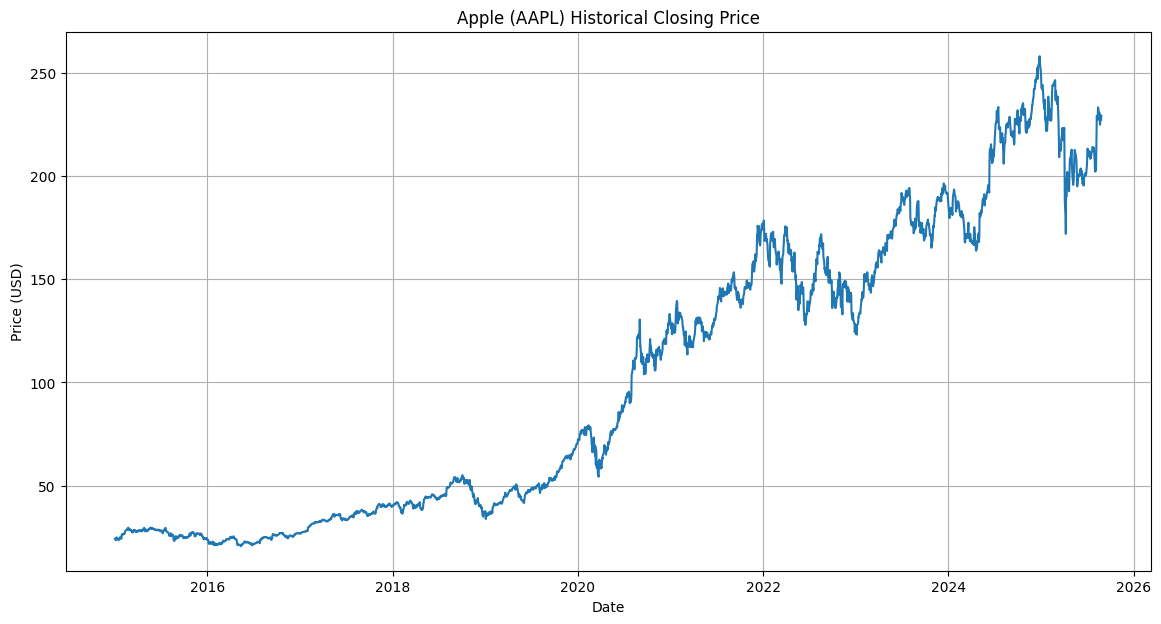

Successfully downloaded data:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-08-20  226.009995  230.470001  225.770004  229.979996  42263900
2025-08-21  224.899994  226.520004  223.779999  226.270004  30621200
2025-08-22  227.759995  229.089996  225.410004  226.169998  42477800
2025-08-25  227.160004  229.300003  226.229996  226.479996  30983100
2025-08-26  229.309998  229.490005  224.690002  226.869995  54524400
Feature Engineering complete.
Price            Close         t-1         t-2         t-3 moving_avg_5
Ticker            AAPL                                                 
Date                                                                   
2023-12-22  191.974686  193.045593  193.194366  195.286621   193.549344
2023-12-26  191.429291  191.974686  193.045593  193.194366   192.986111
2023-12-27  191.528442  191.

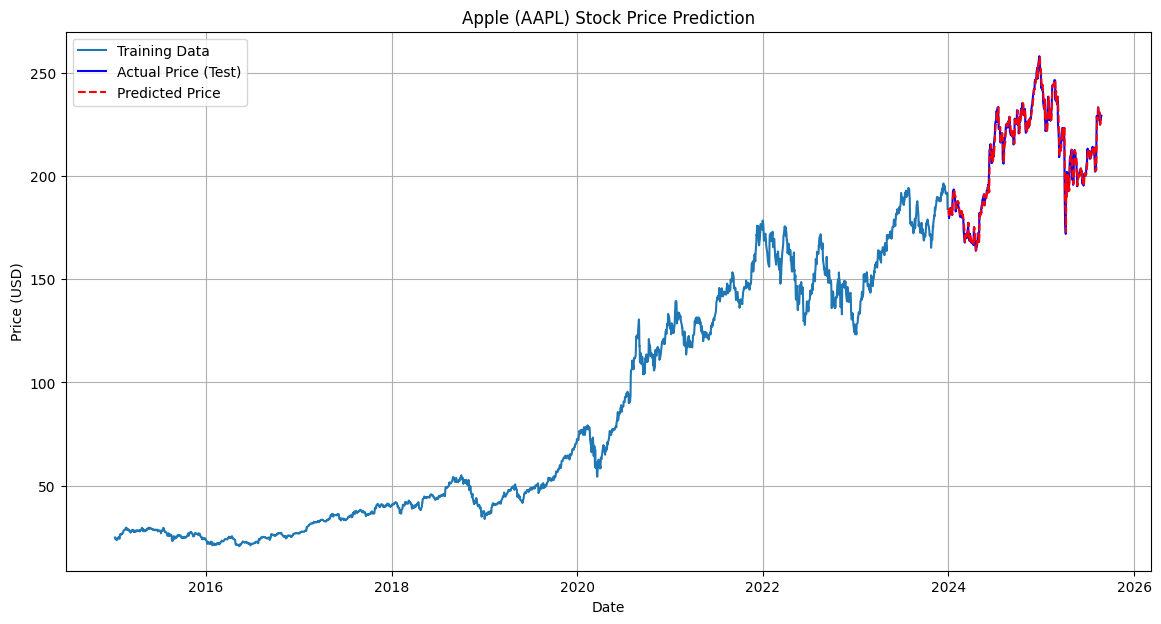

In [3]:
# Install the yfinance library
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock ticker and the date range
ticker = 'AAPL'
start_date = '2015-01-01'
end_date = '2025-08-27' # Using today's date

# Download the stock data
data = yf.download(ticker, start=start_date, end=end_date)

# --- Visualize the Closing Price ---
plt.figure(figsize=(14, 7))
plt.plot(data['Close'])
plt.title('Apple (AAPL) Historical Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

# Display the last few rows of the data
print("Successfully downloaded data:")
print(data.tail())

# Create a new dataframe with only the 'Close' column
df = data[['Close']].copy()

# --- Feature Engineering ---
# Create our target variable (the price we want to predict)
df['target'] = df['Close'].shift(-1)

# Create lag features
df['t-1'] = df['Close'].shift(1)
df['t-2'] = df['Close'].shift(2)
df['t-3'] = df['Close'].shift(3)

# Create a moving average feature
df['moving_avg_5'] = df['Close'].rolling(window=5).mean()

# Remove rows with NaN values created by shifting/rolling
df.dropna(inplace=True)

# --- Data Splitting ---
# Define our features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data at a specific date
split_date = '2024-01-01'
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# Display the results
print("Feature Engineering complete.")
print(X_train.tail())
print("\nData Splitting complete.")
print(f"Training set size: {len(X_train)} days")
print(f"Test set size: {len(X_test)} days")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# --- Train the Model ---
# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# --- Make Predictions ---
predictions = model.predict(X_test)

# --- Evaluate the Model ---
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): ${mae:.2f}")

# --- Visualize the Results ---
# Create a dataframe for plotting
results = pd.DataFrame(index=data.index)
results['Train'] = y_train
results['Test'] = y_test
results['Predictions'] = pd.Series(predictions, index=X_test.index)

# Plot the training data, actual test data, and predictions
plt.figure(figsize=(14, 7))
plt.plot(results['Train'], label='Training Data')
plt.plot(results['Test'], label='Actual Price (Test)', color='blue')
plt.plot(results['Predictions'], label='Predicted Price', color='red', linestyle='--')
plt.title('Apple (AAPL) Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()